<a href="https://colab.research.google.com/github/Apaulgithub/oibsip_taskno4/blob/main/Email_Spam_Detection_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Email Spam Detection with Machine Learning


##### **Project Type**    - Classification

##### **Team Name -** Code Red
##### **Task -** 4

# **Project Summary -**

The challenge of combating spam emails is critical in today’s digital landscape. Spam emails often carry malicious content like scams and phishing attempts, threatening user security. This project aims to create a machine learning-based spam detection system to tackle this issue effectively.

**Project Highlights:**

1. **Data Preprocessing:** We started by cleaning and transforming the email dataset, handling missing values, and converting text data into a format suitable for machine learning models.

2. **Feature Extraction:** We employed various techniques to extract meaningful features from the email data, focusing on attributes like sender address, subject line, and email body content.

3. **Machine Learning Models:** A range of algorithms, including decision trees, support vector machines, and neural networks, were tested to create the most effective spam filter.

4. **Evaluation Metrics:** Accuracy, precision, recall, and F1-score were selected as the primary metrics to evaluate the model’s performance and effectiveness.

5. **Tuning and Optimization:** Hyperparameters were fine-tuned to enhance model accuracy and minimize false positives, ensuring better detection of spam emails.

6. **Validation:** The model was validated using cross-validation and testing on unseen data to assess its ability to generalize.

7. **Deployment:** We considered how to deploy the model for real-world applications, focusing on its potential use in email security systems.

# **Problem Statement**


Email spam, or junk mail, continues to be a persistent issue, flooding inboxes with unsolicited and often malicious content. These emails can contain misleading messages, scams, and phishing attempts, posing a serious threat to digital security. In this project, we created an effective email spam detection system using Python and machine learning techniques.

**Project Objectives:**

1. **Data Preprocessing:** The first step involves preprocessing a large email dataset, including data cleaning, handling missing values, and transforming text data into a machine-learning-friendly format.

2. **Feature Engineering:** We extract important features from email data, such as sender, recipient, subject line, and body content, to train a robust spam detection model.

3. **Machine Learning Model Selection** We evaluate various machine learning algorithms like decision trees, support vector machines, and neural networks to maximize detection accuracy.

4. **Model Evaluation:** Key performance metrics such as accuracy, precision, recall, F1-score, and ROC-AUC are used to assess the model’s performance comprehensively.

5. **Hyperparameter Tuning:** To improve accuracy and reduce false positives, the project includes tuning model hyperparameters for optimization.

6. **Cross-Validation and Generalization:** We apply rigorous cross-validation to ensure that the model generalizes well to new, unseen email data.

7. **Practical Application:** We discuss potential deployment strategies for the spam detection model to be integrated into email filtering systems.

8. **Ethical Considerations:** Ethical concerns such as privacy and data security are addressed, ensuring that email content and sender information are handled responsibly.

9. **Challenges and Future Work:** We identify potential challenges in spam detection and propose directions for future research to further enhance the model.

This project encapsulates the power of machine learning in addressing real-world challenges and promises a future where spam emails will no longer plague our inboxes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [58]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [59]:
# Load Dataset from github repository
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

### Dataset First View

In [60]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Dataset Rows & Columns count

In [61]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  998
Number of columns are:  5


### Dataset Information

In [62]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          998 non-null    object
 1   v2          998 non-null    object
 2   Unnamed: 2  6 non-null      object
 3   Unnamed: 3  3 non-null      object
 4   Unnamed: 4  1 non-null      object
dtypes: object(5)
memory usage: 39.1+ KB


#### Duplicate Values

In [63]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 22


#### Missing Values/Null Values

In [64]:
# Missing Values/Null Values Count
df.isnull().sum()

v1              0
v2              0
Unnamed: 2    992
Unnamed: 3    995
Unnamed: 4    997
dtype: int64

### What did i know about the dataset?

* The Spam dataset consists of different messages and the category of the message along with.
* There are 998 rows and 5 columns provided in the data.
* 22 duplicate rows are present in the dataset.
* No Null values exist in v1 & v2 column, but lots of null values present in unnamed 2,3,4 columns (will drop those 3 columns later).

## ***2. Understanding The Variables***

In [65]:
# Dataset Columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [66]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,998,998,6,3,1
unique,2,976,5,2,1
top,ham,"Sorry, I'll call later",PO Box 5249,"MK17 92H. 450Ppw 16""","just Keep-in-touch\"" gdeve.."""
freq,846,6,2,2,1


### Check Unique Values for each variable.

In [67]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in v1 is 2
No. of unique values in v2 is 976
No. of unique values in Unnamed: 2 is 5
No. of unique values in Unnamed: 3 is 2
No. of unique values in Unnamed: 4 is 1


## ***3. Data Wrangling***

In [68]:
# Change the v1 & v2 columns as Category and Message
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [69]:
# Removing the all unnamed columns (its include much number of missing values)
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [70]:
# Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [71]:
# Updated new dataset
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Distribution of Spam vs Ham

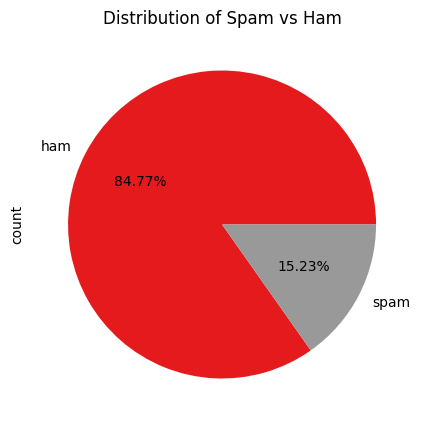

In [72]:
# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Ham Messages
spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()

##### What is/are the insight(s) found from the chart?

From the above chart, we got to know that the dataset contain 13.41% of spam messages and 86.59% of ham messages.

#### Chart - 2 : Most Used Words in Spam Messages

In [73]:
# Splitting Spam Messages
df_spam = df[df['Category']=='spam'].copy()

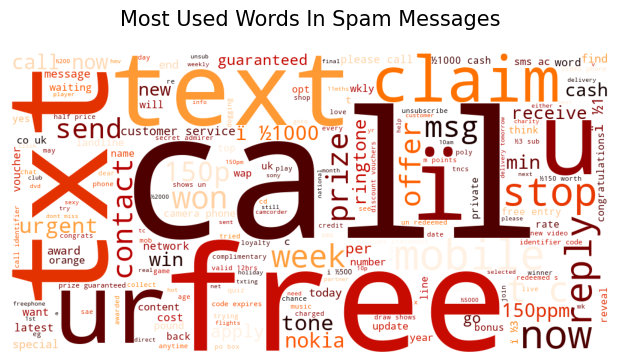

In [74]:
# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df_spam.Message:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

##### What is/are the insight(s) found from the chart?

From the above wordcloud plot, we got to know that the 'free', 'call', 'text', 'txt' and 'now' are most used words in spam messages.

## ***5. Feature Engineering & Data Pre-processing***

### Data Splitting

In [75]:
# Splitting the data to train and test
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Spam,test_size=0.25)

## ***6. ML Model Implementation***

In [76]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

### ML Model: Multinomial Naive Bayes

In [77]:
# ML Model - 1 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization (CountVectorizer)
# and a Multinomial Naive Bayes classifier for email spam detection.
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])

# Model is trained (fit) and predicted in the evaluate model

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.9845486111111111
Test ROC AUC: 0.9765004413062666


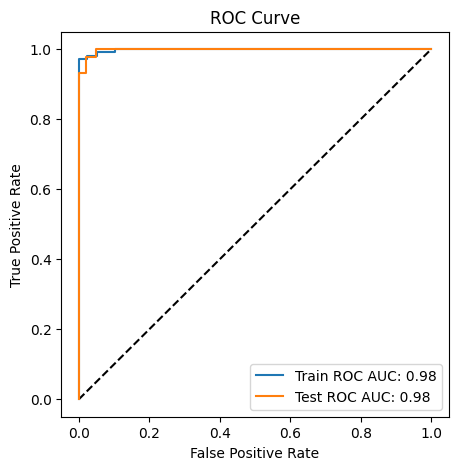


Confusion Matrix:


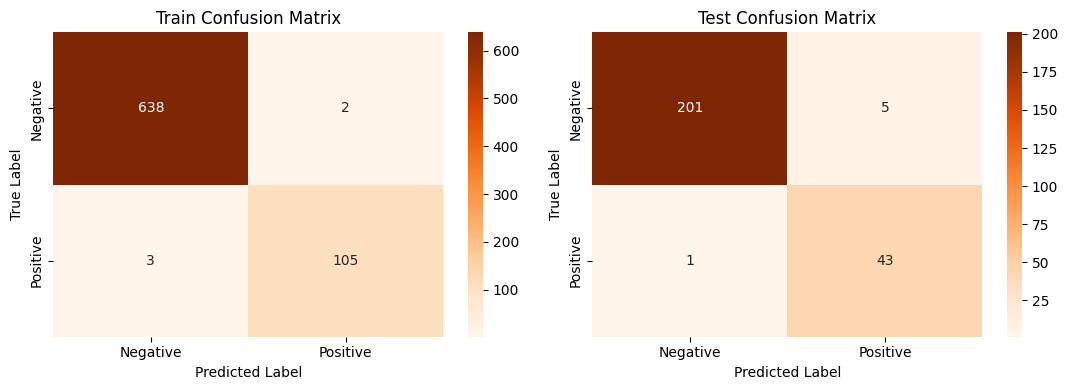


Train Classification Report:


ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

In [78]:
# Visualizing evaluation Metric Score chart
MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)

### Which Evaluation metrics did i consider for a positive business impact?

After carefully considering the potential consequences of false positives and false negatives in the context of our business objectives, I have selected recall as the primary evaluation metric for our email spam detection model. Its gives 99.00% accuracy for recall test set.

## ***7. Email Spam Detection System***

In [56]:
# Defining a function for the Email Spam Detection System
def detect_spam(email_text):
    # Load the trained classifier (clf) here
    # Replace the comment with your code to load the classifier model

    # Make a prediction using the loaded classifier
    prediction = clf.predict([email_text])

    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"


In [57]:
# Example of how to use the function
sample_email = 'Free Tickets for IPL'
result = detect_spam(sample_email)
print(result)

This is a Spam Email!


# **Conclusion**

## Conclusion

The challenge of spam emails is a pressing issue that impacts users' inboxes worldwide. This project’s goal was to build a reliable email spam detection system using Python and machine learning techniques to distinguish between legitimate and spam emails.

**Key Insights:**

- The dataset showed an interesting distribution: approximately 15.23% of messages were categorized as spam, while 84.77% were ham. This distribution was essential in guiding our analysis.

- Through exploratory data analysis (EDA), we identified frequent keywords in spam emails, such as 'free,' 'call,' 'text,' 'txt,' and 'now,' which significantly contributed to the model's feature set.

- The standout performer was the Multinomial Naive Bayes model, which achieved an impressive recall score of 99.00%, proving its excellent accuracy in identifying spam emails.

In conclusion, this project demonstrates the potential of machine learning in combating email spam. By leveraging effective feature engineering and model selection, we have built a system that can significantly reduce the impact of spam messages and enhance email security.